In [2]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.colors
import matplotlib.pyplot as plt

In [3]:
clusterings = ["ULF", "ELF", "HF", "UH", "EH"]
rename_dict = {i:clusterings[i] for i in range(len(clusterings))}

In [4]:
ndc_fit_comparison_two_sided = pd.read_csv("ndc_fit_comparison_two_sided.csv", header=None)
ndc_symmetric_comparison_two_sided = pd.read_csv("ndc_symmetric_comparison_two_sided.csv", header=None)
ndc_flat_comparison_two_sided = pd.read_csv("ndc_flat_comparison_two_sided.csv", header=None)
ndc_permutation_comparison_two_sided = pd.read_csv("ndc_permutation_comparison_two_sided.csv", header=None)
ndc_comparison = pd.read_csv("ndc_comparison.csv", header=None)

In [5]:
ndc_fit_comparison_two_sided.rename(rename_dict, axis=0, inplace=True)
ndc_fit_comparison_two_sided.rename(rename_dict, axis=1, inplace=True)

ndc_symmetric_comparison_two_sided.rename(rename_dict, axis=0, inplace=True)
ndc_symmetric_comparison_two_sided.rename(rename_dict, axis=1, inplace=True)

ndc_flat_comparison_two_sided.rename(rename_dict, axis=0, inplace=True)
ndc_flat_comparison_two_sided.rename(rename_dict, axis=1, inplace=True)

ndc_permutation_comparison_two_sided.rename(rename_dict, axis=0, inplace=True)
ndc_permutation_comparison_two_sided.rename(rename_dict, axis=1, inplace=True)

ndc_comparison.rename(rename_dict, axis=0, inplace=True)
ndc_comparison.rename(rename_dict, axis=1, inplace=True)

In [6]:
ndc_comparison

,ULF,ELF,HF,UH,EH
ULF,1.000000,0.515000,0.590278,0.987500,0.492500
ELF,0.515000,1.000000,0.304167,0.502500,0.977500
HF,0.590278,0.304167,1.000000,0.577778,0.281667
UH,0.987500,0.502500,0.577778,1.000000,0.500000
EH,0.492500,0.977500,0.281667,0.500000,1.000000


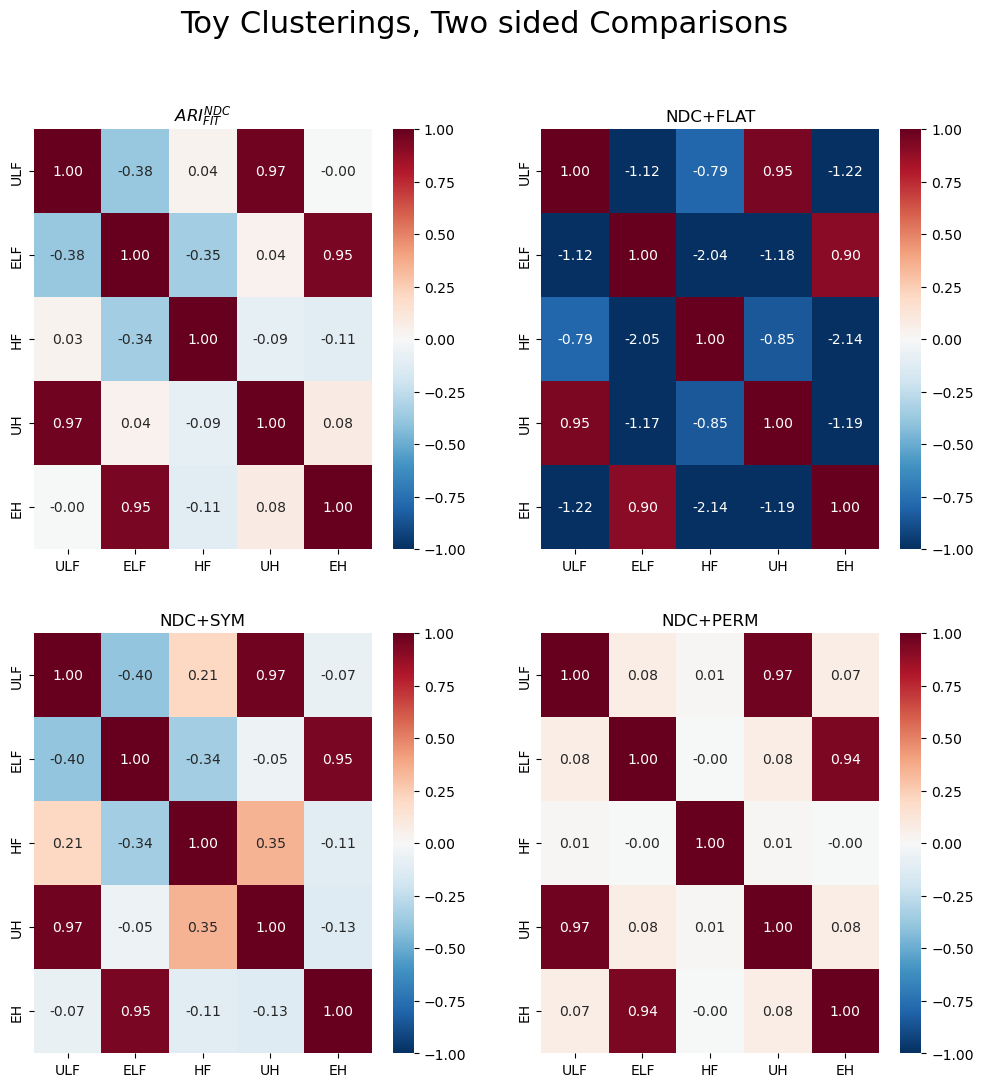

In [7]:
norm = matplotlib.colors.TwoSlopeNorm(0, vmin=-1, vmax=1)

fig, ax = plt.subplots(2, 2, figsize=(12, 12))
sns.heatmap(ndc_fit_comparison_two_sided, annot=True, fmt=".2f", norm=norm, cmap='RdBu_r', ax=ax[0, 0])
sns.heatmap(ndc_symmetric_comparison_two_sided, annot=True, fmt=".2f", norm=norm, cmap='RdBu_r', ax=ax[1, 0])
sns.heatmap(ndc_flat_comparison_two_sided, annot=True, fmt=".2f", norm=norm, cmap='RdBu_r', ax=ax[0, 1])
sns.heatmap(ndc_permutation_comparison_two_sided, annot=True, fmt=".2f", norm=norm, cmap='RdBu_r', ax=ax[1, 1])

ax[0, 0].set_title("NDC+FIT")
ax[1, 0].set_title("NDC+SYM")
ax[0, 1].set_title("NDC+FLAT")
ax[1, 1].set_title("NDC+PERM")

plt.suptitle("Toy Clusterings, Two sided Comparisons", fontsize=22)

plt.savefig("simulation1_two_sided_heatmaps.eps", bbox_inches='tight')

In [8]:
ndc_fit_comparison_one_sided = pd.read_csv("ndc_fit_comparison_one_sided.csv", header=None)
ndc_symmetric_comparison_one_sided = pd.read_csv("ndc_symmetric_comparison_one_sided.csv", header=None)
ndc_flat_comparison_one_sided = pd.read_csv("ndc_flat_comparison_one_sided.csv", header=None)
ndc_permutation_comparison_one_sided = pd.read_csv("ndc_permutation_comparison_one_sided.csv", header=None)

In [9]:
ndc_fit_comparison_one_sided.rename(rename_dict, axis=0, inplace=True)
ndc_fit_comparison_one_sided.rename(rename_dict, axis=1, inplace=True)

ndc_symmetric_comparison_one_sided.rename(rename_dict, axis=0, inplace=True)
ndc_symmetric_comparison_one_sided.rename(rename_dict, axis=1, inplace=True)

ndc_flat_comparison_one_sided.rename(rename_dict, axis=0, inplace=True)
ndc_flat_comparison_one_sided.rename(rename_dict, axis=1, inplace=True)

ndc_permutation_comparison_one_sided.rename(rename_dict, axis=0, inplace=True)
ndc_permutation_comparison_one_sided.rename(rename_dict, axis=1, inplace=True)

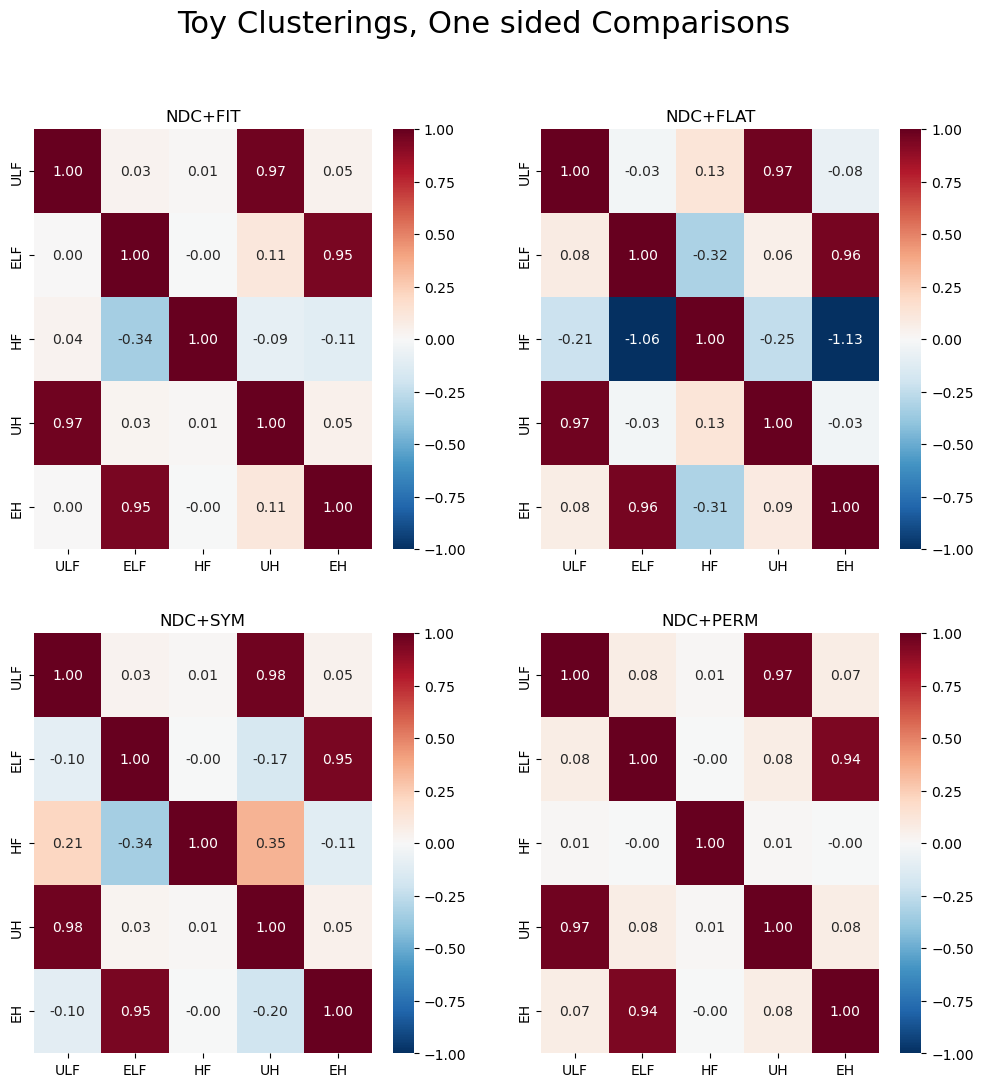

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
sns.heatmap(ndc_fit_comparison_one_sided, annot=True, fmt=".2f", norm=norm, cmap='RdBu_r', ax=ax[0, 0])
sns.heatmap(ndc_symmetric_comparison_one_sided, annot=True, fmt=".2f", norm=norm, cmap='RdBu_r', ax=ax[1, 0])
sns.heatmap(ndc_flat_comparison_one_sided, annot=True, fmt=".2f", norm=norm, cmap='RdBu_r', ax=ax[0, 1])
sns.heatmap(ndc_permutation_comparison_one_sided, annot=True, fmt=".2f", norm=norm, cmap='RdBu_r', ax=ax[1, 1])

ax[0, 0].set_title("NDC+FIT")
ax[1, 0].set_title("NDC+SYM")
ax[0, 1].set_title("NDC+FLAT")
ax[1, 1].set_title("NDC+PERM")

plt.suptitle("Toy Clusterings, One sided Comparisons", fontsize=22)

plt.savefig("simulation1_one_sided_heatmaps.eps", bbox_inches='tight')

<Axes: >

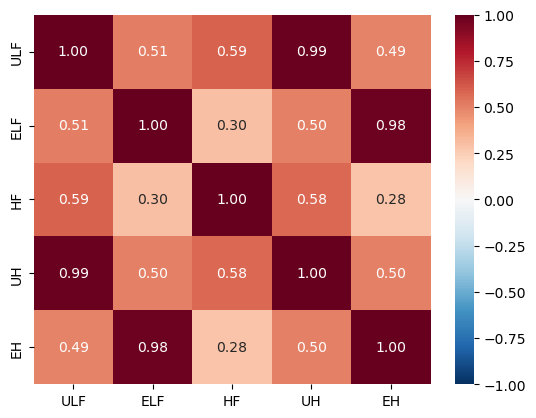

In [11]:
sns.heatmap(ndc_comparison, annot=True, fmt=".2f", norm=norm, cmap='RdBu_r')

## Heatmap of spearman rank correlations

In [12]:
type(ndc_comparison.values)

numpy.ndarray

In [13]:
def make_rank_vector(comparison_df):
    comparisons = comparison_df.copy()
    comparisons = comparisons.astype("str")
    for r in list(comparisons.index):
        for c in list(comparisons.columns):
            comparisons.loc[r, c] = r + "-" + c
    df_flat = comparison_df.values.flatten()
    comparisons_flat = comparisons.values.flatten()
    sort_permutation = df_flat.argsort()
    return comparisons_flat[sort_permutation]

In [14]:
comparison_dfs = [
    ndc_comparison,
    ndc_fit_comparison_two_sided,
    ndc_symmetric_comparison_two_sided,
    ndc_flat_comparison_two_sided,
    ndc_permutation_comparison_two_sided,
    ndc_fit_comparison_one_sided,
    ndc_symmetric_comparison_one_sided,
    ndc_flat_comparison_two_sided,
    ndc_permutation_comparison_one_sided,
    ]

ranks = np.array([make_rank_vector(comparison_df) for comparison_df in comparison_dfs])

In [15]:
coeffs, p = spearmanr(ranks, axis=1)

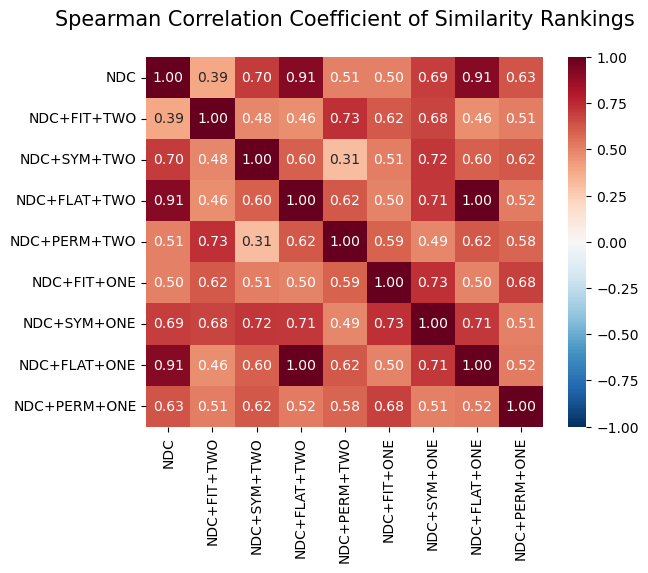

In [21]:
coeffs_df = pd.DataFrame(
    coeffs,
    index=["NDC", "NDC+FIT+TWO", "NDC+SYM+TWO", "NDC+FLAT+TWO", "NDC+PERM+TWO", "NDC+FIT+ONE", "NDC+SYM+ONE", "NDC+FLAT+ONE", "NDC+PERM+ONE"],
    columns=["NDC", "NDC+FIT+TWO", "NDC+SYM+TWO", "NDC+FLAT+TWO", "NDC+PERM+TWO", "NDC+FIT+ONE", "NDC+SYM+ONE", "NDC+FLAT+ONE", "NDC+PERM+ONE"]
    )

sns.heatmap(coeffs_df, annot=True, fmt=".2f", norm=norm, cmap='RdBu_r')
plt.title("Spearman Correlation Coefficient of Similarity Rankings\n", fontsize=15)

plt.savefig("spearman_coefficients.eps", bbox_inches='tight')